In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalle

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im
from ultralytics import YOLO
from IPython.display import Image, display

In [2]:
# Setting up the data
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zipfile_data = zipfile.ZipFile('/content/drive/MyDrive/Projects/Zipped_Data/Capstone.zip', 'r')
unzipped_data = zipfile_data.extractall('/content/data')
zipfile_data.close()

In [5]:
#Instanciating the previously crashed model that trained for 20 epochs
model = YOLO('/content/35_epochs.pt')

In [11]:
#Define a destination directory for all results
project_results = "/content/data"
#Define subdirectory for this specific model training
model_1 = "50_epochs-" #note that if you run the training again, it creates another directory

In [7]:
# This is the third training session for this model
results = model.train(data='/content/data/data.yaml',
                      project=project_results,
                      name=model_1,
                      epochs=50,
                      patience=0, #I am setting patience=0 to disable early stopping, beause the model is nowhere near ready to deploy
                      batch=6, # For this training I am choosing a training batch of 6 to compare the training time to the batch of 4 used before
                      imgsz=640)

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/35_epochs.pt, data=/content/data/data.yaml, epochs=15, patience=0, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data, name=15_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

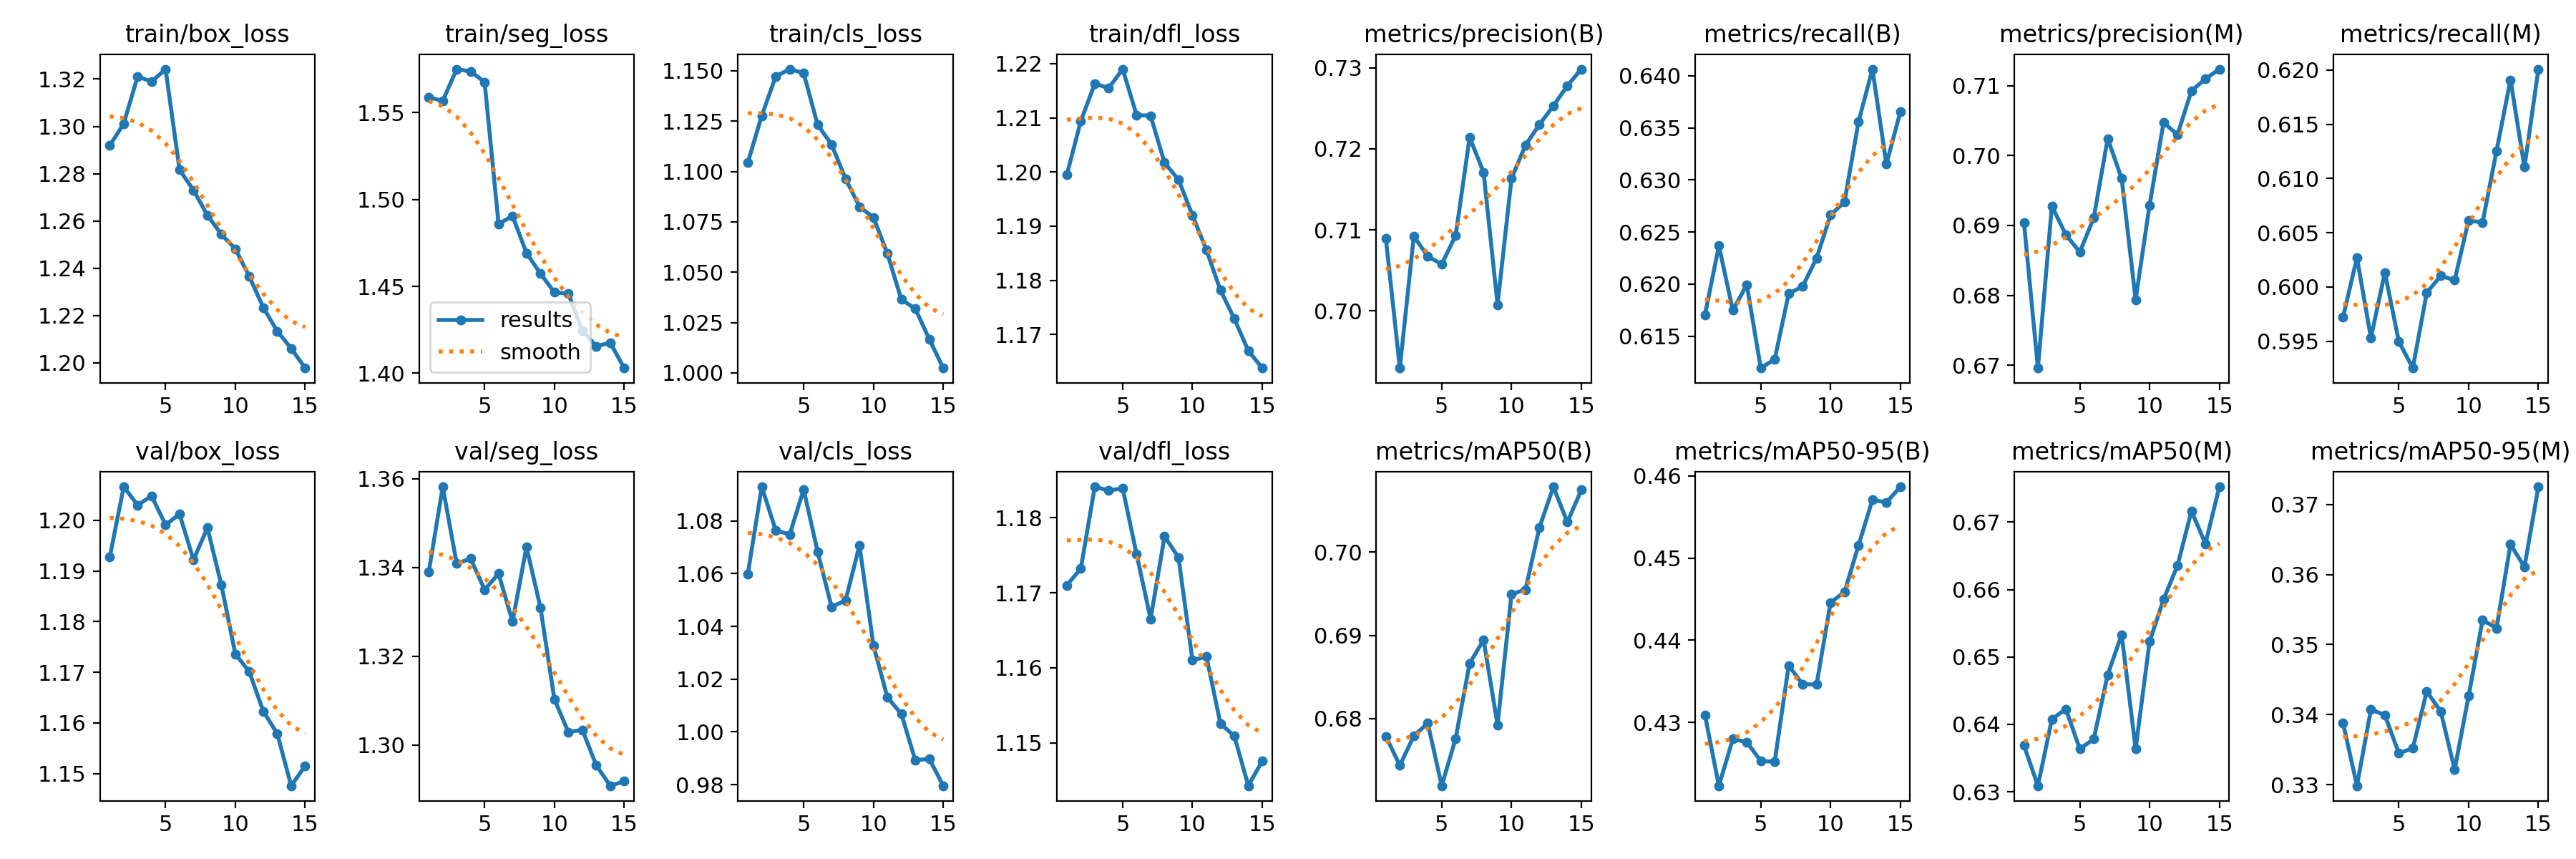

In [9]:
Image("/content/data/15_epochs-/results.png")

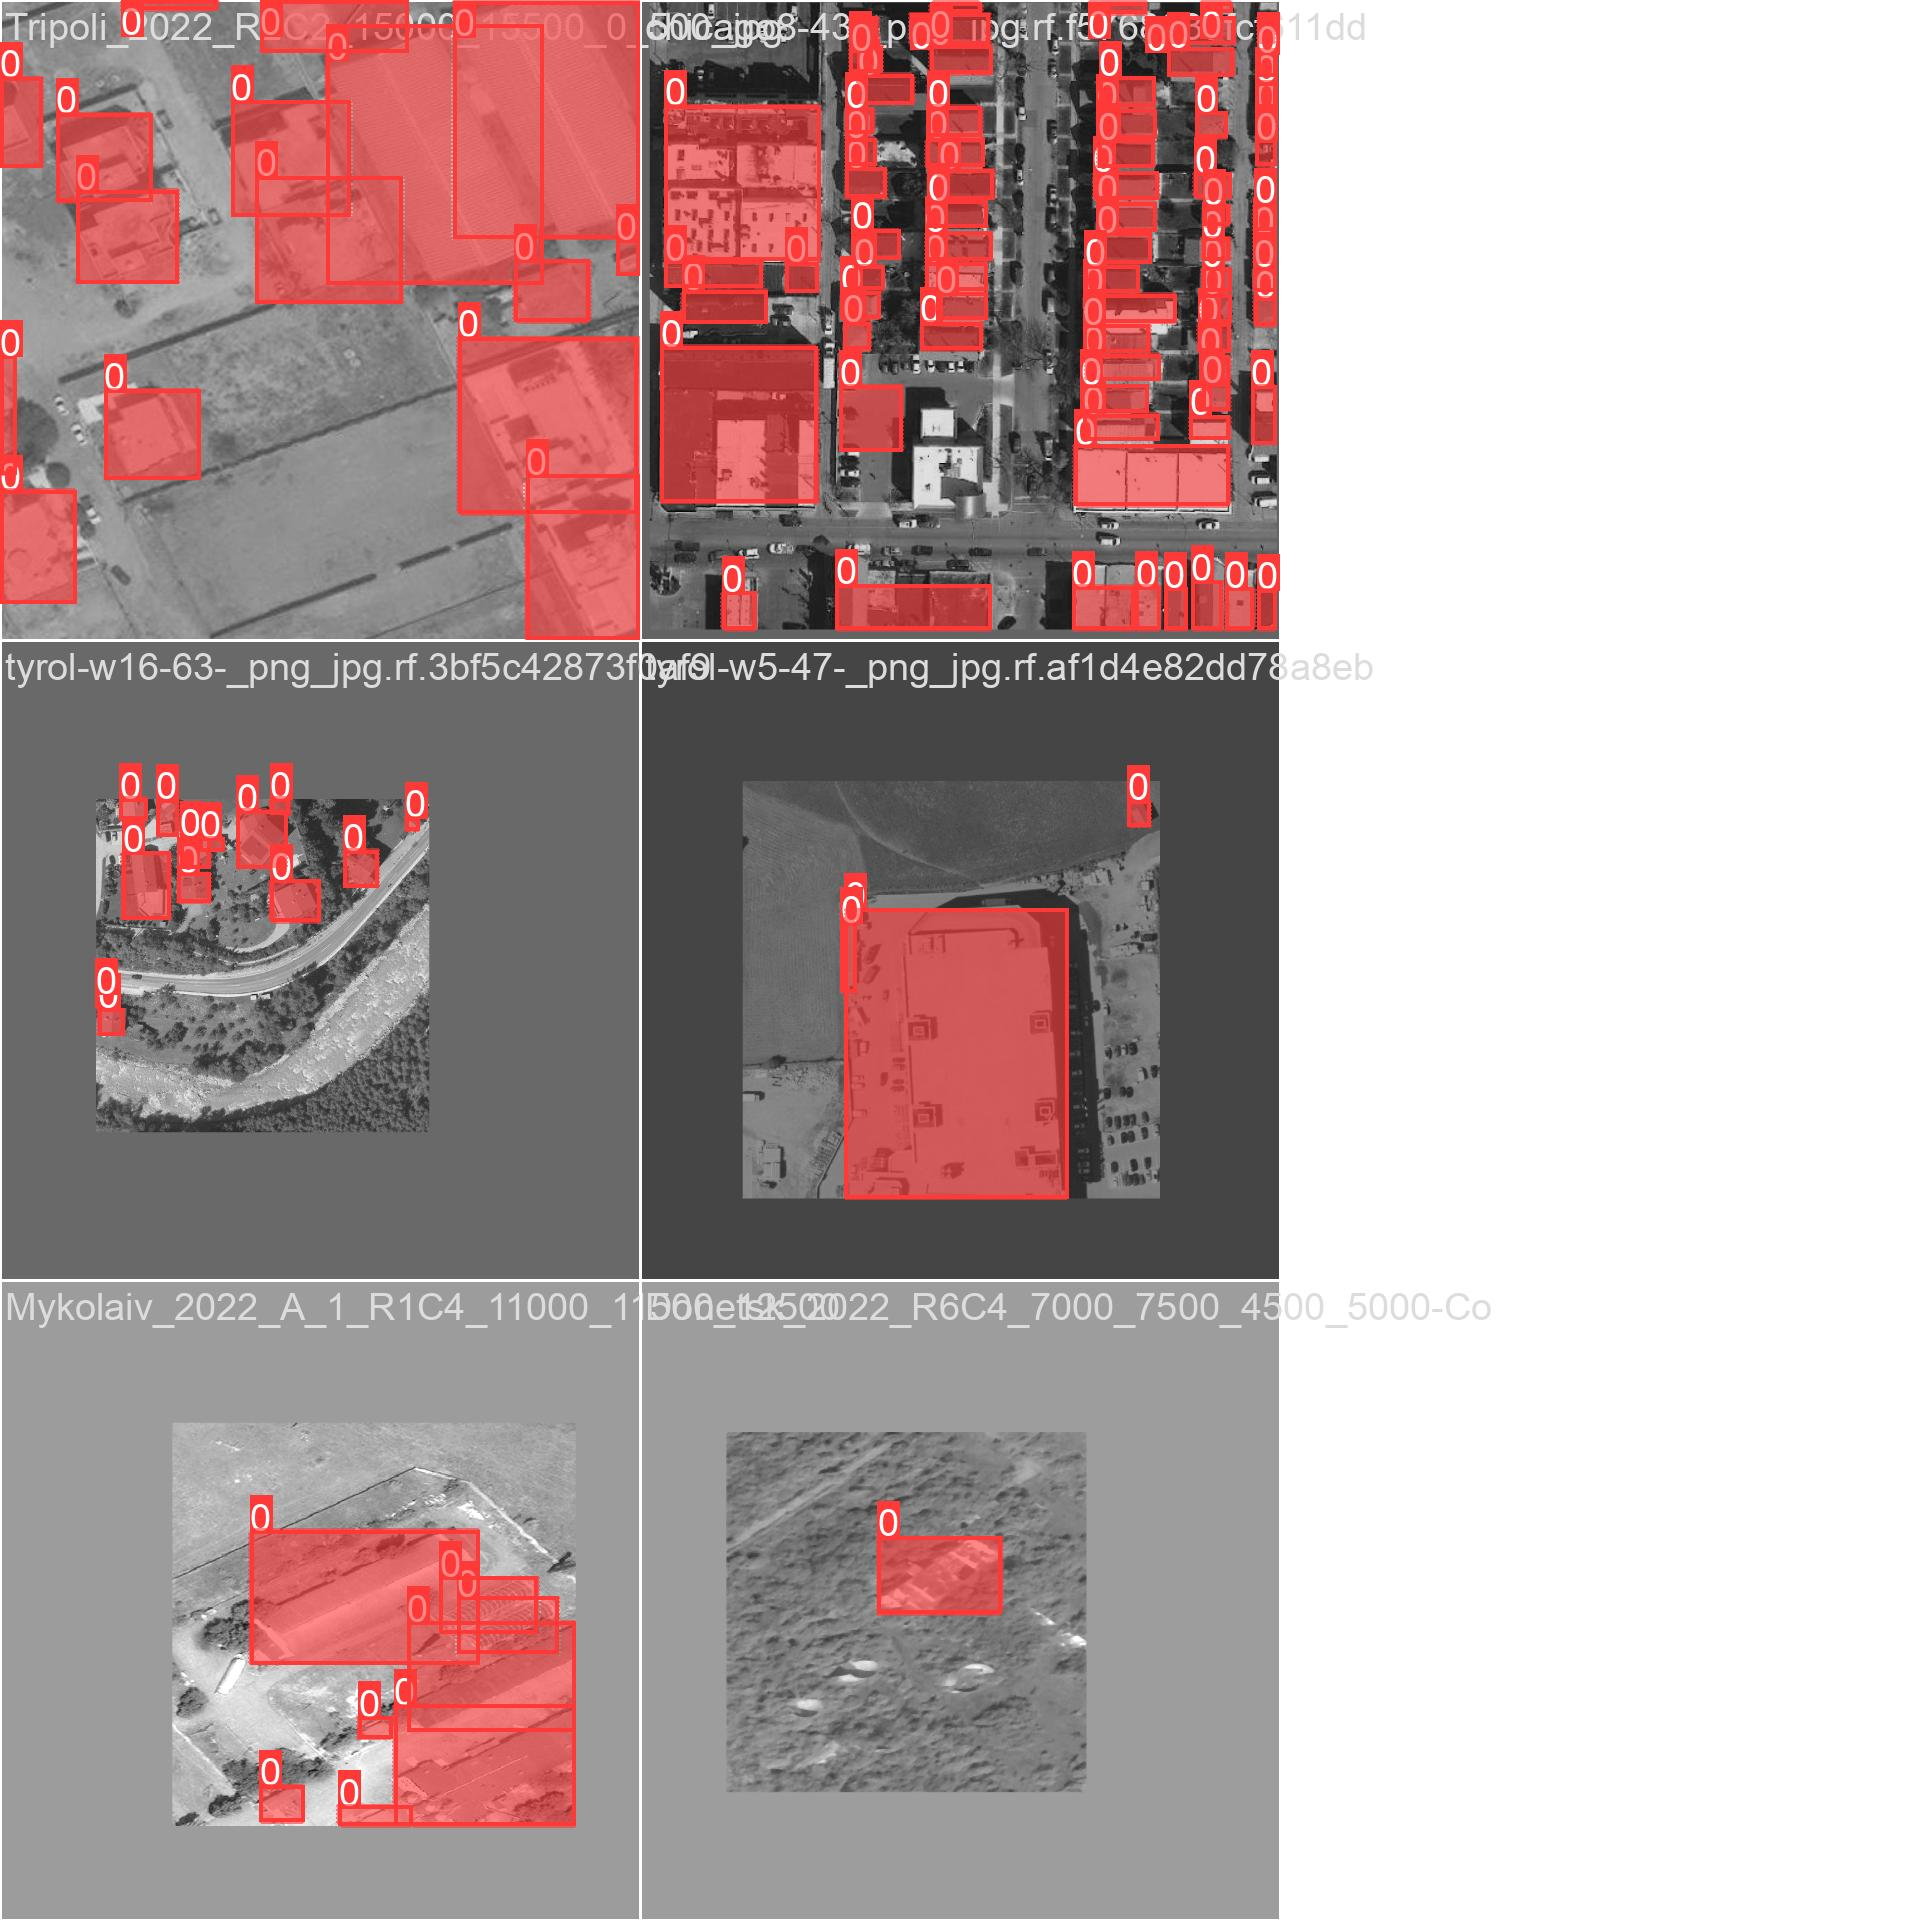

In [12]:
Image(filename='/content/data/15_epochs-/train_batch4947.jpg')

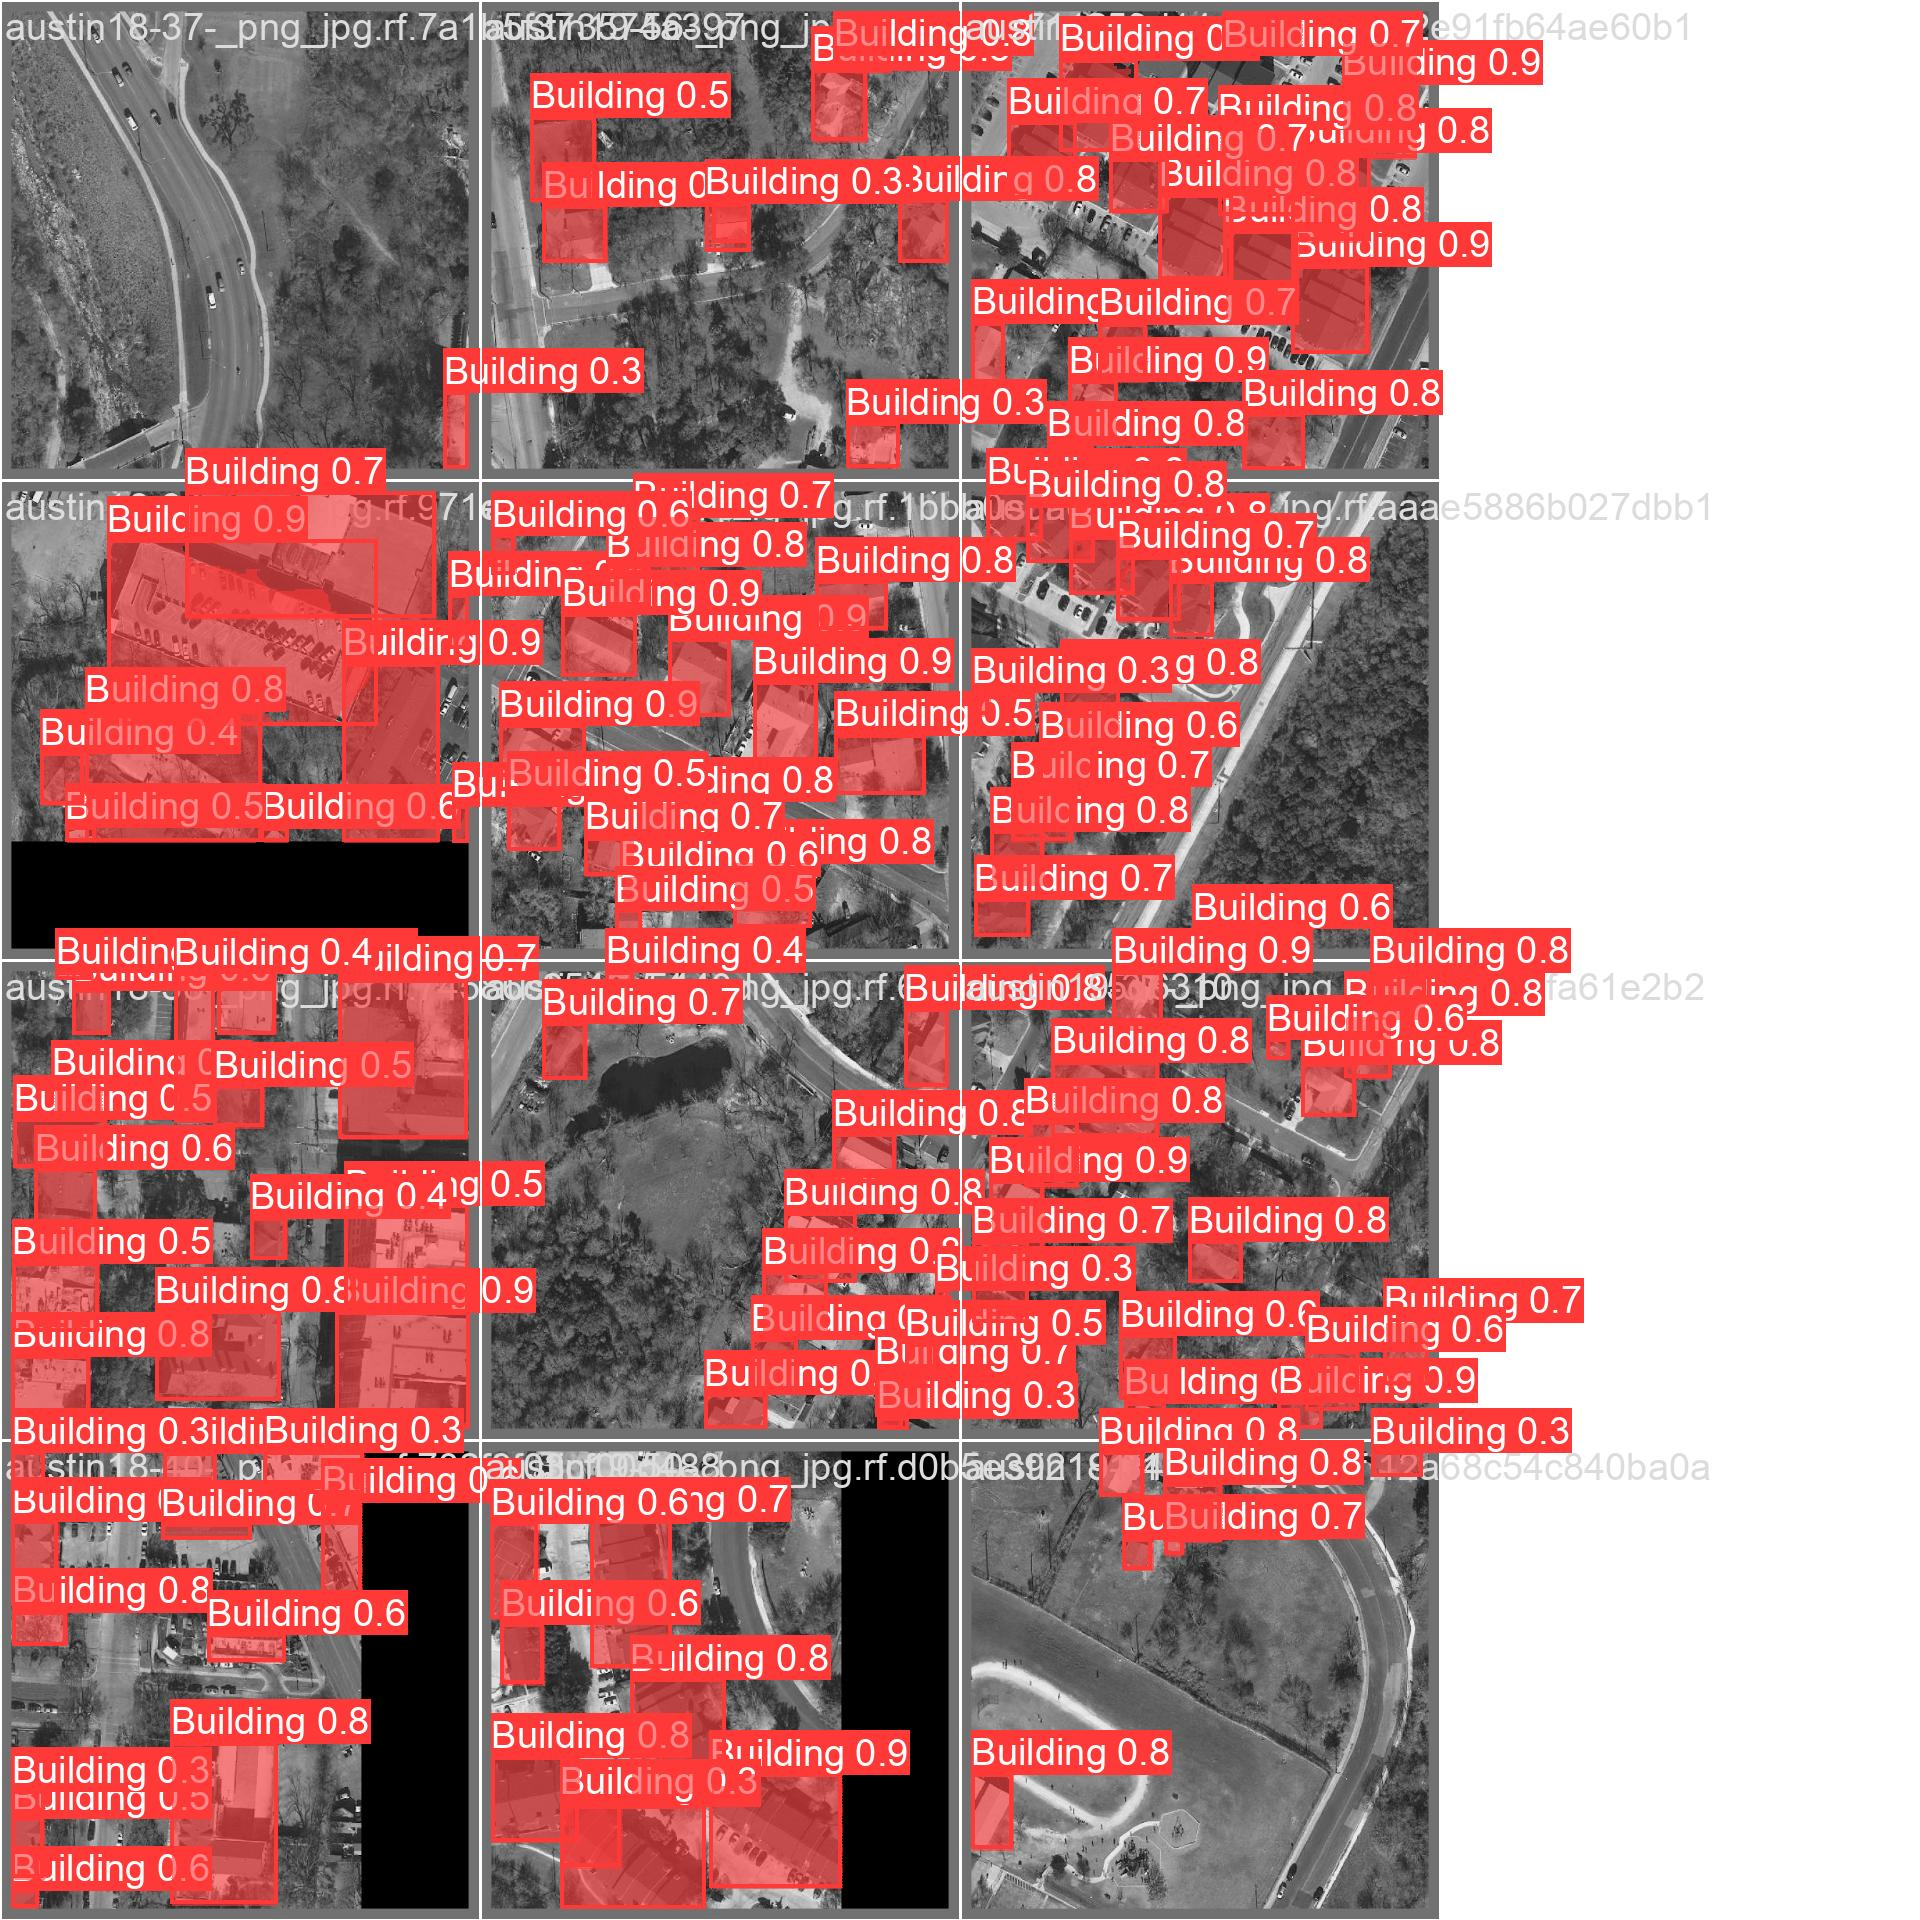

In [14]:
Image(filename='/content/data/15_epochs-/val_batch2_pred.jpg')

In [15]:
trained_model_1 = YOLO('/content/data/15_epochs-/weights/best.pt')


In [20]:
test_image_1 = '/content/drive/MyDrive/Projects/Unzipped_Data/Original_Dataset_Test_Image_Color_3/Kherson_2022_V2_R4C4_14000_14500_10000_10500_jpg.rf.e3453f1f283e2fe6b5e8a5e3929c5f75.jpg'
results_test_image_1 = trained_model_1.predict(test_image_1, conf=0.2)


image 1/1 /content/drive/MyDrive/Projects/Unzipped_Data/Original_Dataset_Test_Image_Color_3/Kherson_2022_V2_R4C4_14000_14500_10000_10500_jpg.rf.e3453f1f283e2fe6b5e8a5e3929c5f75.jpg: 640x640 41 Buildings, 16.4ms
Speed: 3.5ms preprocess, 16.4ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)


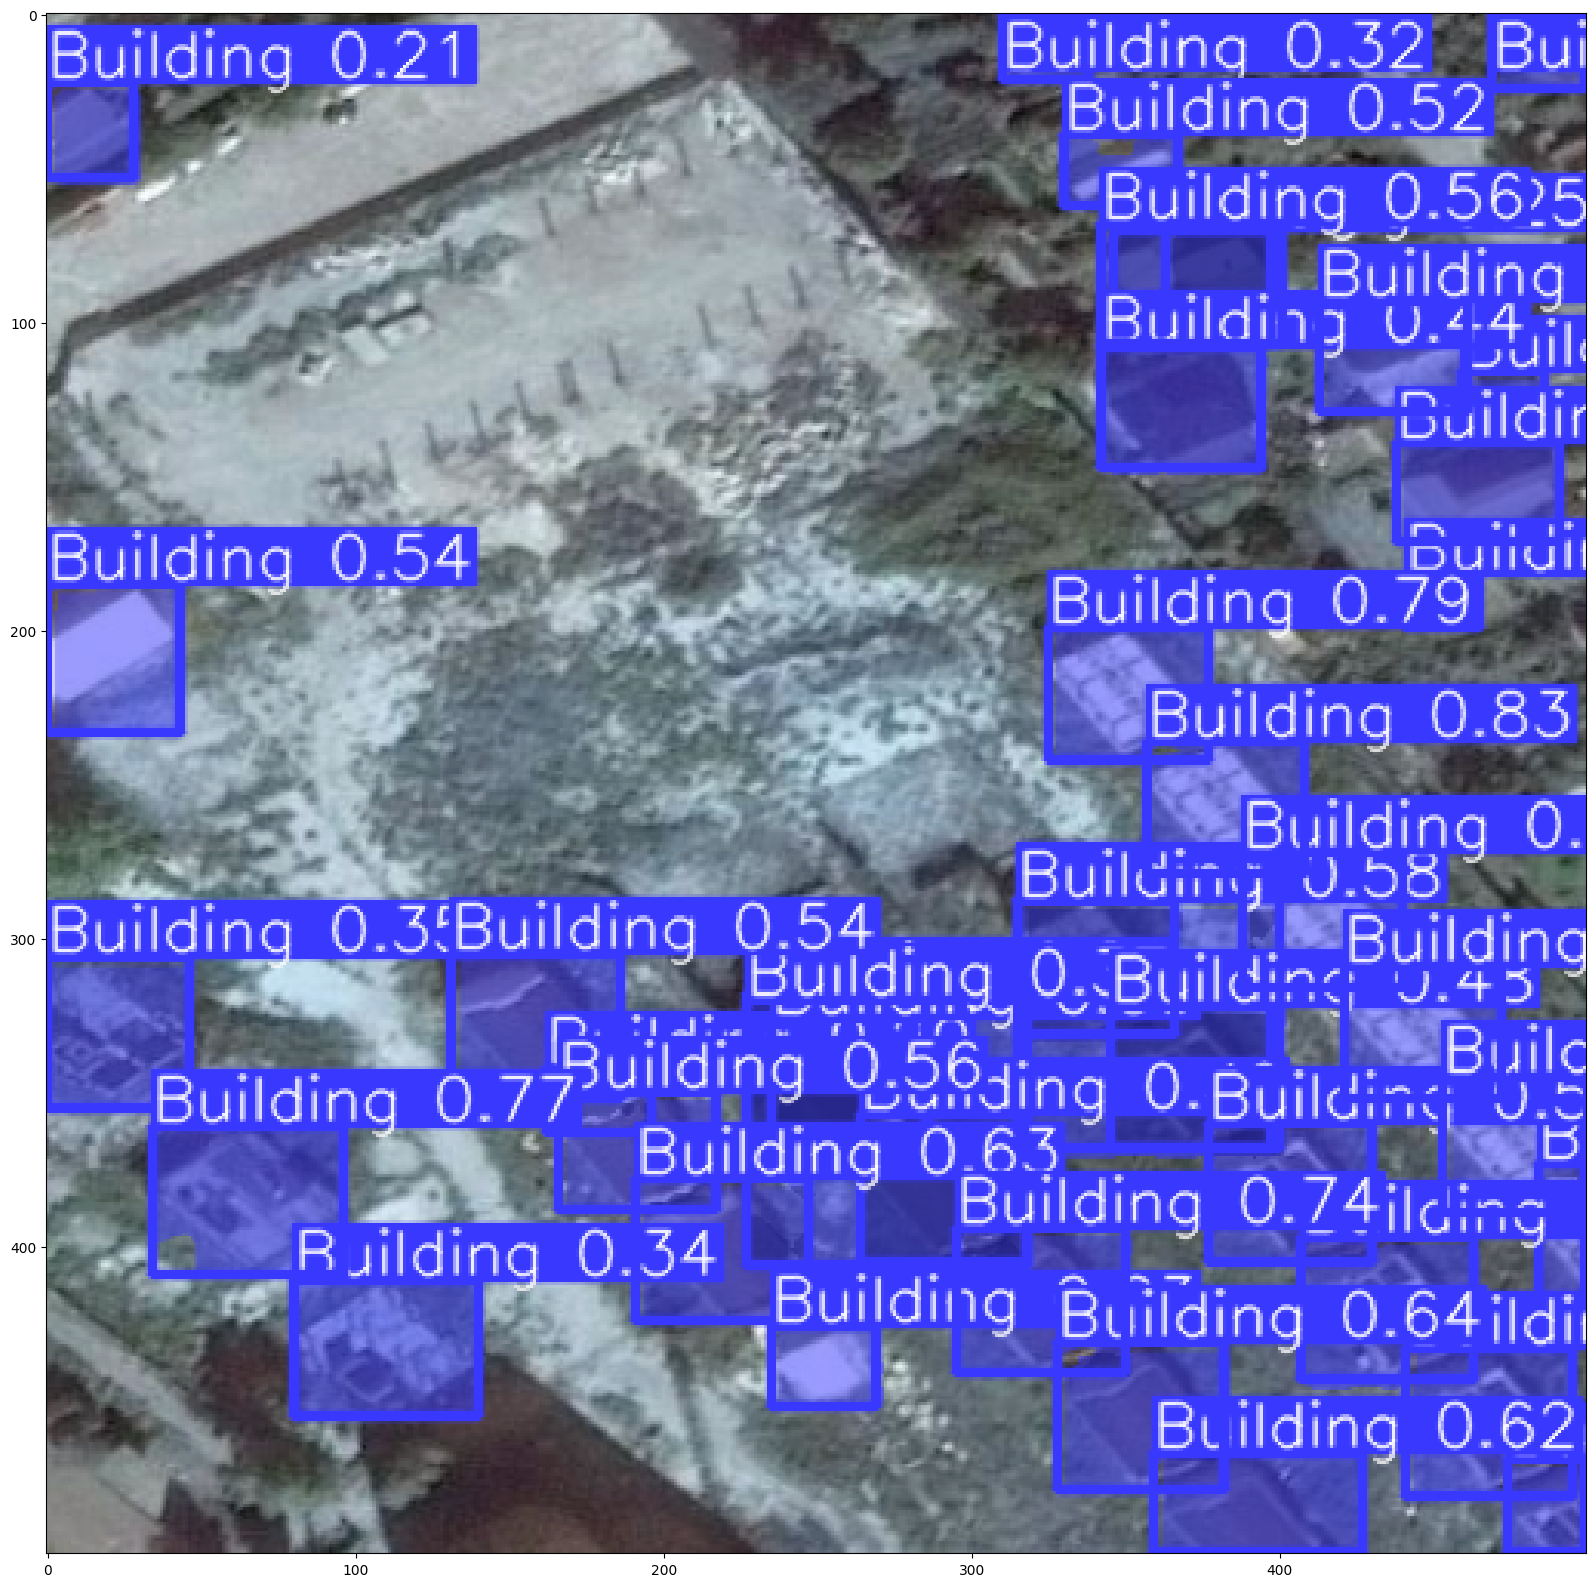

In [21]:
test_image_1_array = results_test_image_1[0].plot()
plt.figure(figsize=(20, 20))
plt.imshow(test_image_1_array)